In [22]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
california_housing = fetch_california_housing()

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['Price'] = california_housing.target  # Add the target variable (house prices)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [55]:
# Check for missing values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [57]:

X = df.drop('Price', axis = 1)
y = df['Price']

X.shape, y.shape 

((20640, 8), (20640,))

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2)

X_train.shape, y_train.shape

((16512, 8), (16512,))

In [71]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
# Predict and evaluate
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

Mean Squared Error: 0.5633026924903232
R-squared: 0.5812358737163237


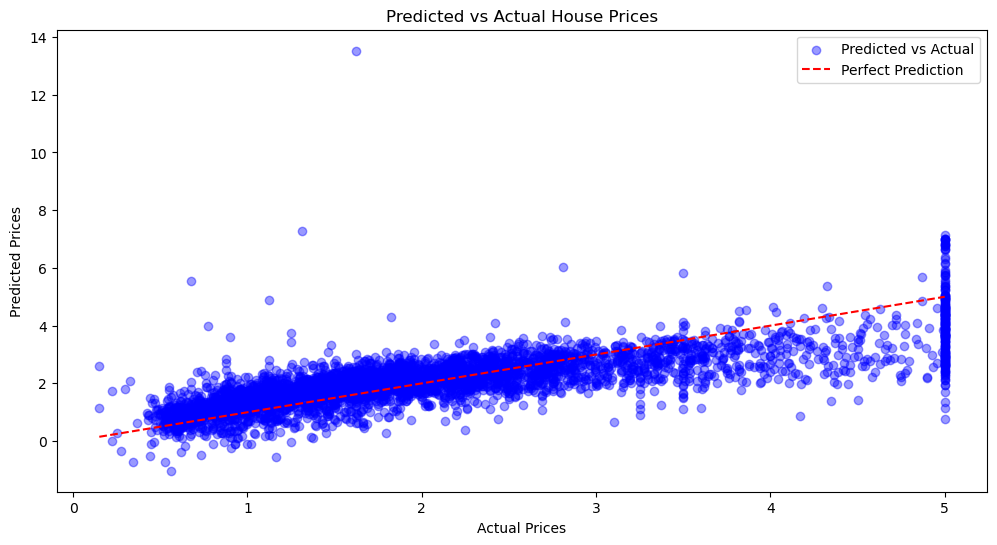

In [120]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha = .4, color='blue', label='Predicted vs Actual')

# Plot a line for perfect predictions (y = x line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction")

# Labeling the plot
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual House Prices')
plt.legend()

# Show the plot
plt.show()